# CH 2.2 - Tensors

### In this document we go through the code examples from chapters 2.2 & 2.3 of the Deep Learning with Python book

In [2]:
import numpy as np

#### Scalars - 0D Tensors

In [3]:
x=np.array(1)

In [4]:
x.ndim

0

In [5]:
x.shape

()

Rank of number is 1, so need to check actual definition of rank. EDIT: Seems the method used by linalg already implies the parameter is a matrix. The documentation mentions that rank cannot be equal to 0 unless it is fed a zero matrix.  https://numpy.org/devdocs/reference/generated/numpy.linalg.matrix_rank.html

In [6]:
np.linalg.matrix_rank(x)

1

#### Vectors - 1D Tensors

In [7]:
x=np.array([1,2])

In [8]:
x.ndim

1

In [9]:
x.shape

(2,)

In [10]:
np.linalg.matrix_rank(x)

1

#### Matrices - 2D Tensors

In [11]:
x=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [12]:
x.ndim

2

In [13]:
x.shape

(3, 3)

In [14]:
np.linalg.matrix_rank(x)

2

Now we see how a *rank defficient* matrix will retrun a lower rank using the SVD method

In [15]:
x=np.array([[0,2,3],[0,4,6],[0,0,0]])

In [16]:
x.ndim

2

In [17]:
np.linalg.matrix_rank(x)

1

#### 3D Tensors - and higher dim

In [18]:
x=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])

In [19]:
x.ndim

3

In [20]:
x.shape

(3, 2, 3)

### Exploring MNIST properties


In [21]:
from keras.datasets import mnist

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [22]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [23]:
print(train_images.ndim)

3


In [24]:
print(train_images.shape)

(60000, 28, 28)


In [25]:
print(train_images.dtype)

uint8


In [26]:
digit=train_images[364]

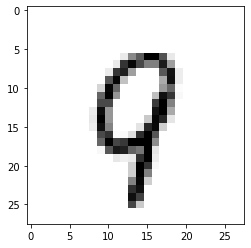

In [27]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [28]:
np.linalg.matrix_rank(train_images[0])

20

The rank is 20 because we have 8 zero rows, which decreases its rank

### Tensor slicing excersise

In [29]:
my_slice = train_images[10:100]

In [30]:
print(my_slice.shape)

(90, 28, 28)


An equivalent method as before`

In [31]:
my_slice=train_images[10:100,:,:]

In [32]:
print(my_slice.shape)

(90, 28, 28)


In [33]:
my_slice=train_images[10:100,0:28,0:28]

In [34]:
print(my_slice.shape)

(90, 28, 28)


In [35]:
my_slice=train_images[0,0:20,0:20]

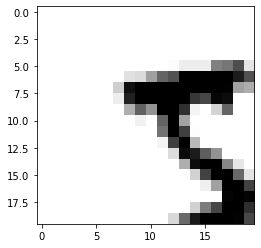

In [36]:
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

We can also use negative indeces. *i.e.* Select all images, only 14x14 px

In [37]:
my_slice=train_images[:,0:14,0:14]

In general, axis 0 in tensors contain the samples (MNIS=images in [0,i,j]) and is known as the *sample axis*. When considering batches, axis 0 will be known as the *batch axis*

In [38]:
batch= train_images[:128]

In [39]:
batch2= train_images[128:256]

In [40]:
batch = train_images[128*n:128*(n+1)]

NameError: name 'n' is not defined

The code above spices the vector into 128 sized batches. *n* is multiplying on both sides to move in 128 units.

In [41]:
batch.shape

(128, 28, 28)

# CH 2.3 - Tensor Operations

Look at MNIST NN, realize we have a code that looks like ```keras.layers.Dense(512, activation='relu'```. This is equivalent to:

```output= relu(dot(W,input) + b)```  Meaning we perform a dot product between the input and the layer's weights and add the biases. This is then put through the *activation* function (in this case ```relu =  max(x,0)```)

#### 2.3.1 Element-wise operations

In [42]:
def naive_relu(x):
    output=x
    for idx1,i in enumerate(x):
        for idx2,j in enumerate(i):
            output[idx1][idx2]=max(j,0)
    return output

In [178]:
x=[[1,2,3],[0,-1,-5],[3.33,24,-44]]

In [44]:
res=naive_relu(x)

In [45]:
res

[[1, 2, 3], [0, 0, 0], [3.33, 24, 0]]

*Numpy* equivalent:


In [46]:
import numpy as np
res=np.maximum(x,0)

In [47]:
res

array([[ 1.  ,  2.  ,  3.  ],
       [ 0.  ,  0.  ,  0.  ],
       [ 3.33, 24.  ,  0.  ]])

#### 2.3.2 Broadcasting

It is a method of performing tensor operations when axis are different *i.e.* adding a matrix to a vector.

***NOTE:*** Typically, this type of implementations only expand the axes of the lacking vector only virtually and not definetively, as the latter would cause large quantities of memory to be wasted (i.e. repeating information)

Example:

In [48]:
def naive_matrix_vector_sum(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    res=x.copy()
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            res[i,j]=x[i,j]+y[j]
    return res

In [49]:
y=np.array([5,4,3])
x=np.asmatrix(x)
res=naive_matrix_vector_sum(x,y)
print(res)

[[ 6.    6.    6.  ]
 [ 5.    4.    3.  ]
 [ 8.33 28.    3.  ]]


In [50]:
res

matrix([[ 6.  ,  6.  ,  6.  ],
        [ 5.  ,  4.  ,  3.  ],
        [ 8.33, 28.  ,  3.  ]])

#### 2.3.3 Tensor dot product

##### Dot product between two vectors

In [172]:
def naive_vector_dot(x,y):
    assert len(x.shape)==1
    assert len(y.shape)==1
    assert x.shape[0]==y.shape[0]
    z=0 
    for i in range(0,x.shape[0]):
        z+=x[i]+y[i]
    return z

In [173]:
x=np.array([1,2,3])

In [60]:
y

array([5, 4, 3])

In [66]:
res=naive_vector_dot(x,y)

In [68]:
res

18

For a 2D tensor the vector dot is the sum of its elements, they have to have the **same dimensions**

##### Dot product between matrix and vector

Matrix row size has to be the same size as the vector being multiplied

In [179]:
def dot_matrix_vector(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    
    z=np.zeros(x.shape[0])  ## The output will be a vector of same size as x's amount of rows
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i]+= x[i,j] * y[j]
    return z

In [180]:
x=np.asmatrix([[1,2,3],[4,5,6],[7,8,9],[12,13,14]])

In [181]:
dot_matrix_vector(x,y)

AssertionError: 

##### Dot product between matrix and matrix

Dot product is only defined when *x* has the same number of columns as rows in *y*

In [196]:
def dot_matrix_matrix(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==2
    assert x.shape[1]==y.shape[0]
    
    z=np.zeros((x.shape[0],y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x= x[i,:].getA1()  ## I used A1 here but could also use the flatten function, conflicts when asserting a one dim matrix
            column_y=y[:,j].getA1()
            z[i,j] = naive_vector_dot(row_x,column_y)
    return z

In [183]:
x

matrix([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [12, 13, 14]])

In [184]:
y=np.asmatrix([[1,2,3],[1,2,3],[1,2,3]])
x=np.asmatrix([[1,2,3],[4,5,6],[7,8,9],[12,13,14]])

In [185]:
x.shape


(4, 3)

In [186]:
res=dot_matrix_matrix(x,y)

In [188]:
res

array([[ 9., 12., 15.],
       [18., 21., 24.],
       [27., 30., 33.],
       [42., 45., 48.]])

In [190]:
res=res.reshape(res.shape[0]*res.shape[1],1)

In [191]:
res

array([[ 9.],
       [12.],
       [15.],
       [18.],
       [21.],
       [24.],
       [27.],
       [30.],
       [33.],
       [42.],
       [45.],
       [48.]])

In [195]:
res.flatten().shape

(12,)

#### 2.3.5 Geometric interpretation of tensor operations

A rotation of a 2D vector by angle theta can be acheived by a dot product. Let's test it out

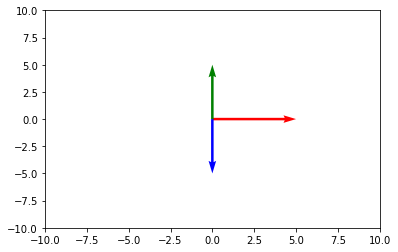

In [240]:
import numpy as np
import matplotlib.pyplot as plt

v1=[[0,0],[4,0]]
v2=[[0,0],[0,-4]]
v3=[[0,0],[0,4]]

plt.quiver([v1[0][0],v2[0][0],v3[0][0]], [v1[0][1],v2[0][1],v3[0][1]], [v1[1][0],v2[1][0],v3[1][0]], [v1[1][1],v2[1][1],v3[1][1]], angles='xy', scale_units='xy', color=['r','b','g'],scale=0.8)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

Now rotate it by 90 degrees (pi/2)

In [253]:
import math
u=[math.cos(math.pi/2),math.sin(math.pi/2)]
v=[-math.sin(math.pi/2),math.cos(math.pi/2)]

In [255]:
R=[u,v]

In [263]:
R=np.asmatrix(R)
v1=np.asarray(v1)
v2=np.asarray(v2)
v3=np.asarray(v3)

In [269]:
v1_0rot= dot_matrix_vector(R,v1[0])
v2_0rot= dot_matrix_vector(R,v2[0])
v3_0rot= dot_matrix_vector(R,v3[0])

v1_1rot= dot_matrix_vector(R,v1[1])
v2_1rot= dot_matrix_vector(R,v2[1])
v3_1rot= dot_matrix_vector(R,v3[1])

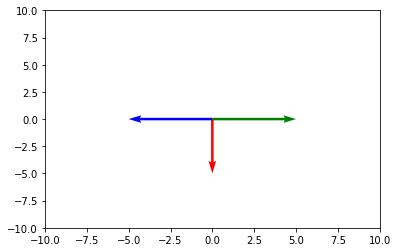

In [272]:
plt.quiver([v1_0rot[0],v2_0rot[0],v3_0rot[0]], [v1_0rot[1],v2_0rot[1],v3_0rot[1]], [v1_1rot[0],v2_1rot[0],v3_1rot[0]], [v1_1rot[1],v2_1rot[1],v3_1rot[1]], angles='xy', scale_units='xy', color=['r','b','g'],scale=0.8)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()